In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/lilexin/Desktop/Project 2/project2 raw data/adoNY_c_f.csv')

In [131]:
df.head(5)

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,...,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_mixed,dad_hispanic,transracial_dummy,ChildRace_Name
0,10115515140,0,2,0,1.0,20.0,1.0,33.0,33.0,1.0,...,0,1,0,0,0,0,0,0,0.0,White
1,10185923110,1,2,1,2.0,29.0,0.0,45.0,54.0,1.0,...,0,1,0,0,0,0,0,0,1.0,Black
2,10199738080,0,2,0,1.0,24.0,0.0,36.0,45.0,1.0,...,0,1,0,0,0,0,0,0,0.0,White
3,10206906020,0,2,0,NaN,28.0,0.0,41.0,44.0,1.0,...,0,1,0,0,0,0,0,0,NaN,Hispanice
4,10286352150,1,2,1,NaN,36.0,0.0,32.0,32.0,1.0,...,0,1,0,0,0,0,0,0,NaN,Hispanice


1. RECNUM: record number
2. SEX: child sex 1-male 2-female
3. AGYSPNDS: child special needs, 0-not applicable, 1-yes, 2-no, 3-unable to determin
4. AgeAtAdopt: child’s age on date of adoption
5. ChildRace: race of child as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
6. BioMomAgeAtBirth: biological mother’s age on date of child’s birth
7. MOMARRD: biological mother married, 0-not applicable, 1-yes, 2-no, 3-unable to determine
8. AdoptMomAge: adoptive mother’s age on date of adoption
9. AdoptDadAge: adoptive father’s age on date of adoption
10. ADPFAMST: adoptive family structure, 0-not applicable, 1-married couple, 2-unmarried couple, 3-single female, 4-single male, 5-unable to determine
11. MomRace: race of adoptive mother as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
12. DadRace: race of adoptive father as one variable, 1-White, 2-Black, 3-AmInd, 4-Asian, 5-HawaiiPI, 6-More than One Race, 7-Hispanic Origin
13. Transracial: transracial adoption, 0-not transracial, 1-child not White + parent White, 2-child White + parent not White, 3-other transracial, 9-insufficient race info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 13 columns):
RECNUM              1933 non-null int64
SEX                 1933 non-null int64
AGYSPNDS            1933 non-null int64
AgeAtAdopt          1933 non-null int64
ChildRace           1933 non-null int64
BioMomAgeAtBirth    1903 non-null float64
MOMARRD             1890 non-null float64
AdoptMomAge         1890 non-null float64
AdoptDadAge         946 non-null float64
ADPFAMST            1890 non-null float64
MomRace             1933 non-null int64
DadRace             1933 non-null int64
Transracial         1933 non-null int64
dtypes: float64(5), int64(8)
memory usage: 196.4 KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
def drop_99(x):
    if x==99:
        x=np.nan
    
    else:
        x=x
    return x
    

df['ChildRace']=df['ChildRace'].apply(lambda x: drop_99(x))
df['MomRace']=df['MomRace'].apply(lambda x: drop_99(x))
df['DadRace']=df['DadRace'].apply(lambda x: drop_99(x))

In [7]:
def data_glimps(Variable,color,kind):
    fig = plt.figure(figsize=(8,3))
    ax = fig.gca()
    df.groupby([Variable]).size().plot(kind=kind,ax=ax,color=color)
    plt.show()
    

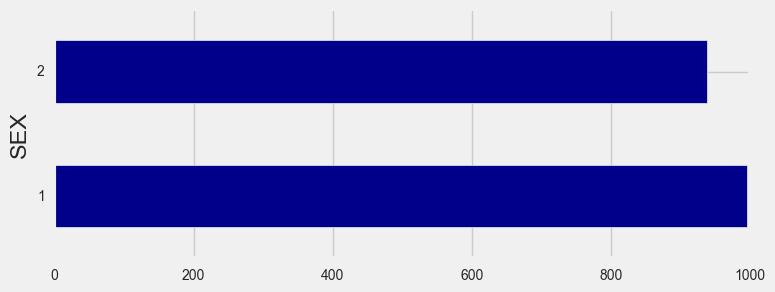

In [8]:
data_glimps('SEX','darkblue','Barh')

In [9]:
df['SEX']=df['SEX'].apply(lambda x: 1 if x==1 else 0)

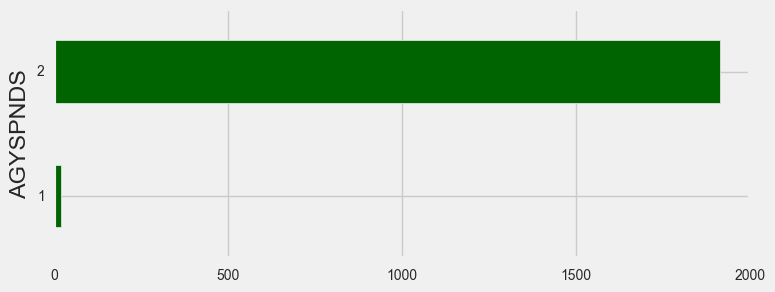

In [10]:
data_glimps('AGYSPNDS','darkgreen','barh')
#acording to the index  and info above, this variable have no missing obs, so we can turn it into a dummy variable

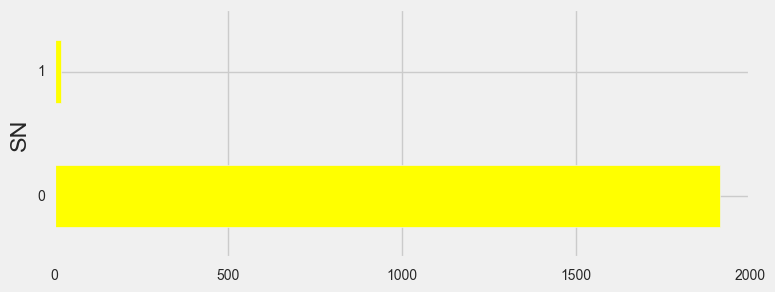

,RECNUM,SEX,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,MomRace,DadRace,Transracial,SN
0,10115515140,0,0,1.0,20.0,1.0,33.0,33.0,1.0,1.0,1.0,0,0
1,10185923110,1,1,2.0,29.0,2.0,45.0,54.0,1.0,1.0,1.0,1,0
2,10199738080,0,0,1.0,24.0,2.0,36.0,45.0,1.0,1.0,1.0,0,0
3,10206906020,0,0,NaN,28.0,2.0,41.0,44.0,1.0,1.0,1.0,9,0
4,10286352150,1,1,NaN,36.0,2.0,32.0,32.0,1.0,1.0,1.0,9,0
5,10291477140,0,0,NaN,23.0,2.0,43.0,39.0,1.0,1.0,1.0,9,0
6,10291478120,1,0,NaN,23.0,2.0,43.0,39.0,1.0,1.0,1.0,9,0
7,10302822130,1,0,1.0,24.0,2.0,60.0,65.0,1.0,1.0,1.0,0,0
8,10330723240,1,0,NaN,22.0,2.0,50.0,52.0,1.0,1.0,1.0,9,0
9,10614847090,0,0,1.0,28.0,2.0,47.0,42.0,1.0,1.0,1.0,0,0


In [11]:
df['SN']=(df['AGYSPNDS']%2)
data_glimps('SN','yellow','barh')
df.drop(['AGYSPNDS'],axis=1)

Finish the cleaning of SN

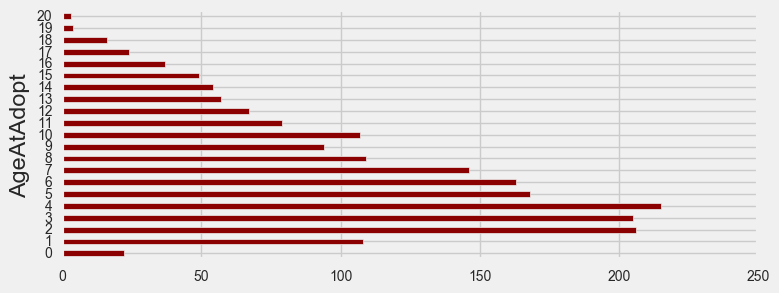

In [12]:
data_glimps('AgeAtAdopt','darkred','barh')

In [13]:
age=df['AgeAtAdopt']
df['std_age_at_adopt']=(age-np.mean(age))/np.std(age)


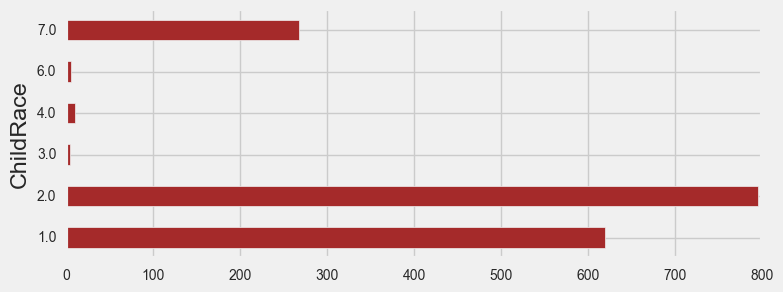

In [14]:
data_glimps('ChildRace','brown','barh')

Two steps to clean this variabl:1.separate it into 6 dummies.
                                2.translate '99' into Nan

In [15]:
df['white']=df['ChildRace']
df['black']=df['ChildRace']
df['amid']=df['ChildRace']
df['asian']=df['ChildRace']
df['hawaii']=df['ChildRace']
df['mixed']=df['ChildRace']
df['hispanic']=df['ChildRace']



In [16]:
def get_white_dummy(x):
    if x==1:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['white']=df['white'].apply(lambda x: get_white_dummy(x))

def get_black_dummy(x):
    if x==2:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['black']=df['black'].apply(lambda x: get_black_dummy(x))

def get_amid_dummy(x):
    if x==3:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['amid']=df['amid'].apply(lambda x: get_amid_dummy(x))

def get_asian_dummy(x):
    if x==4:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['asian']=df['asian'].apply(lambda x: get_asian_dummy(x))

def get_hawaii_dummy(x):
    if x==5:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['hawaii']=df['hawaii'].apply(lambda x: get_hawaii_dummy(x))

def get_mixed_dummy(x):
    if x==6:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['mixed']=df['mixed'].apply(lambda x: get_mixed_dummy(x))

def get_hispanic_dummy(x):
    if x==7:
        x=1
    elif x==99:
        x=np.nan
    else:
        x=0
    return x
    

df['hispanic']=df['hispanic'].apply(lambda x: get_hispanic_dummy(x))

In [17]:
df.tail()

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,...,Transracial,SN,std_age_at_adopt,white,black,amid,asian,hawaii,mixed,hispanic
1928,262695000000,1,2,7,2.0,39.0,2.0,65.0,NaN,3.0,...,0,0,0.068809,0,1,0,0,0,0,0
1929,262696000000,0,2,7,2.0,40.0,2.0,38.0,46.0,1.0,...,3,0,0.068809,0,1,0,0,0,0,0
1930,262696000000,0,2,8,NaN,39.0,2.0,38.0,46.0,1.0,...,9,0,0.298530,0,0,0,0,0,0,0
1931,262699000000,0,2,7,7.0,37.0,2.0,53.0,NaN,3.0,...,0,0,0.068809,0,0,0,0,0,0,1
1932,262699000000,1,2,7,7.0,38.0,2.0,53.0,NaN,3.0,...,0,0,0.068809,0,0,0,0,0,0,1


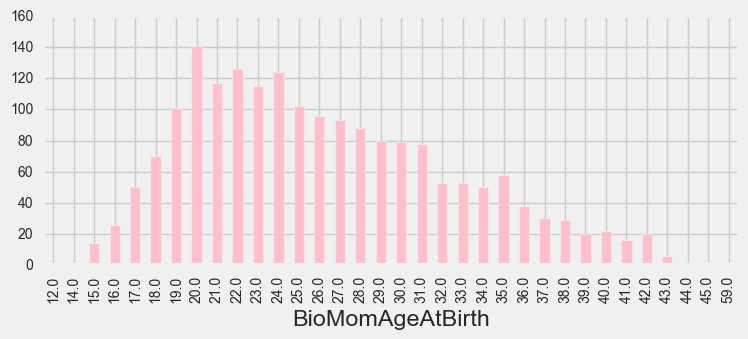

In [18]:
data_glimps('BioMomAgeAtBirth','pink','bar')


In [19]:
agebm=df['BioMomAgeAtBirth']
df['std_bio_mom_age']=(agebm-np.mean(agebm))/np.std(agebm)

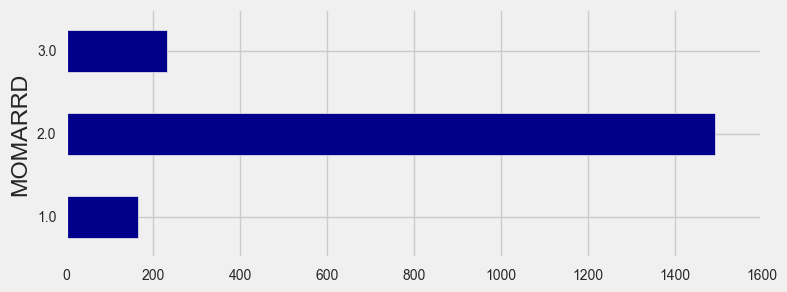

In [20]:
data_glimps('MOMARRD','darkblue','barh')

In [21]:
def get_bio_mom_marriage_dummy(x):
    if x==1:
        x=1
    elif x==3:
        x=np.nan
    else:
        x=0
    return x
    

df['MOMARRD']=df['MOMARRD'].apply(lambda x: get_bio_mom_marriage_dummy(x))

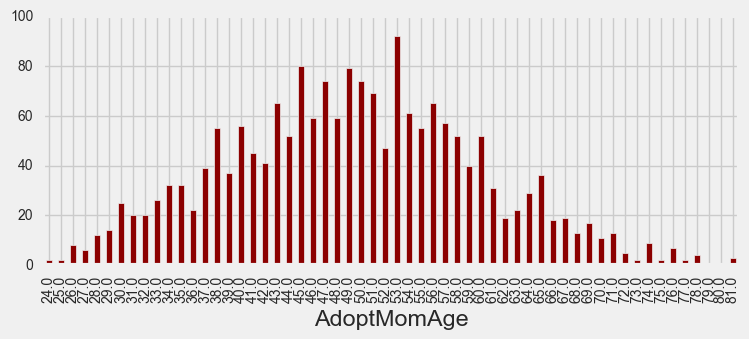

In [22]:
data_glimps('AdoptMomAge','darkred','bar')

In [23]:
ageam=df['AdoptMomAge']
df['std_adopt_mom_age']=(ageam-np.mean(ageam))/np.std(ageam)

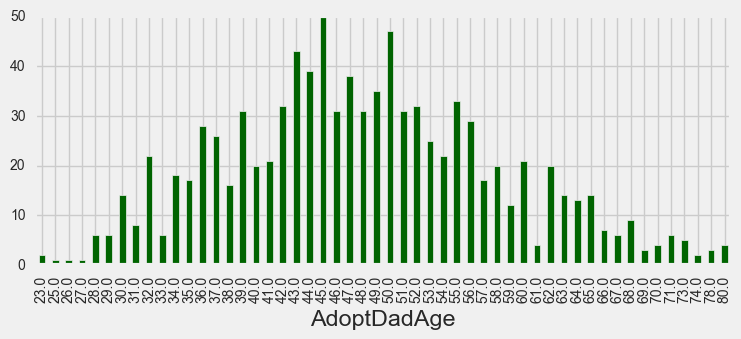

In [24]:
data_glimps('AdoptDadAge','darkgreen','bar')

In [25]:
agead=df['AdoptDadAge']
df['std_adopt_dad_age']=(agead-np.mean(agead))/np.std(agead)

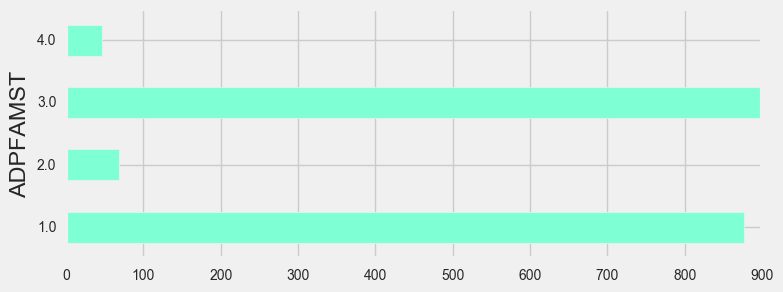

In [26]:
data_glimps('ADPFAMST','aquamarine','barh')

In [27]:
def get_couple_dummy(x):
    if x==1 or x==2:
        x=1
    
    else:
        x=0
    return x
    

df['if_couple']=df['ADPFAMST'].apply(lambda x: get_couple_dummy(x))

In [28]:
def single_female_dummy(x):
    if x==3 :
        x=1
    
    else:
        x=0
    return x
    

df['single_female']=df['ADPFAMST'].apply(lambda x: single_female_dummy(x))

In [29]:
def single_male_dummy(x):
    if x==4 :
        x=1
    
    else:
        x=0
    return x
    

df['single_male']=df['ADPFAMST'].apply(lambda x: single_male_dummy(x))

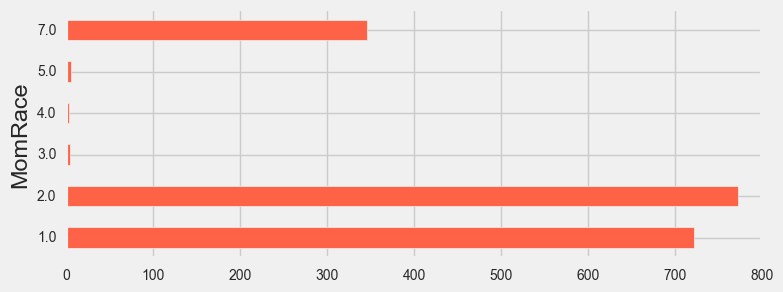

In [30]:
data_glimps('MomRace','tomato','barh')

In [31]:
df['mom_white']=df['MomRace'].apply(lambda x: get_white_dummy(x))
df['mom_black']=df['MomRace'].apply(lambda x: get_black_dummy(x))
df['mom_amid']=df['MomRace'].apply(lambda x: get_amid_dummy(x))
df['mom_asian']=df['MomRace'].apply(lambda x: get_asian_dummy(x))
df['mom_hawaii']=df['MomRace'].apply(lambda x: get_hawaii_dummy(x))
df['mom_mixed']=df['MomRace'].apply(lambda x: get_mixed_dummy(x))
df['mom_hispanic']=df['MomRace'].apply(lambda x: get_hispanic_dummy(x))

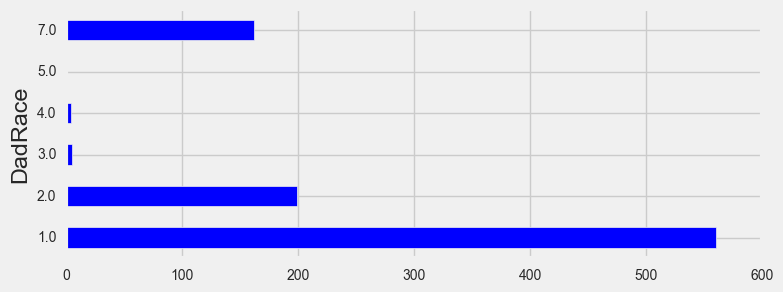

In [32]:
data_glimps('DadRace','blue','barh')

In [33]:
df['dad_white']=df['DadRace'].apply(lambda x: get_white_dummy(x))
df['dad_black']=df['DadRace'].apply(lambda x: get_black_dummy(x))
df['dad_amid']=df['DadRace'].apply(lambda x: get_amid_dummy(x))
df['dad_asian']=df['DadRace'].apply(lambda x: get_asian_dummy(x))
df['dad_hawaii']=df['DadRace'].apply(lambda x: get_hawaii_dummy(x))
df['dad_mixed']=df['DadRace'].apply(lambda x: get_mixed_dummy(x))
df['dad_hispanic']=df['DadRace'].apply(lambda x: get_hispanic_dummy(x))

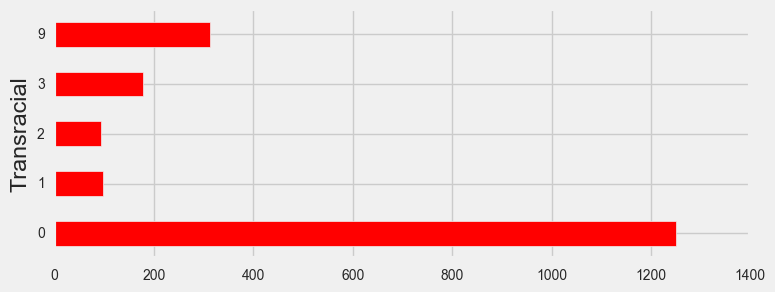

In [34]:
data_glimps('Transracial','red','barh')

In [35]:
def if_transracial_dummy(x):
    return np.nan if x==9 else 1 if x==1 or x== 2 or x ==3  else 0
df['transracial_dummy']=df['Transracial'].apply(lambda x: if_transracial_dummy(x))

In [36]:
df.describe().T

/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
RECNUM,1933.0,2.465849e+11,5.383135e+10,1.011552e+10,2.521900e+11,2.611140e+11,2.618100e+11,2.626990e+11
SEX,1933.0,5.147439e-01,4.999119e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
AGYSPNDS,1933.0,1.989653e+00,1.012169e-01,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
AgeAtAdopt,1933.0,6.700466e+00,4.354240e+00,0.000000e+00,3.000000e+00,6.000000e+00,1.000000e+01,2.000000e+01
ChildRace,1703.0,2.450969e+00,2.044404e+00,1.000000e+00,NaN,NaN,NaN,7.000000e+00
BioMomAgeAtBirth,1903.0,2.622176e+01,6.436882e+00,1.200000e+01,NaN,NaN,NaN,5.900000e+01
MOMARRD,1702.0,9.753231e-02,2.967684e-01,0.000000e+00,NaN,NaN,NaN,1.000000e+00
AdoptMomAge,1890.0,4.934709e+01,1.057095e+01,2.400000e+01,NaN,NaN,NaN,8.100000e+01
AdoptDadAge,946.0,4.806871e+01,1.024434e+01,2.300000e+01,NaN,NaN,NaN,8.000000e+01
ADPFAMST,1890.0,2.060317e+00,1.017352e+00,1.000000e+00,NaN,NaN,NaN,4.000000e+00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 43 columns):
RECNUM               1933 non-null int64
SEX                  1933 non-null int64
AGYSPNDS             1933 non-null int64
AgeAtAdopt           1933 non-null int64
ChildRace            1703 non-null float64
BioMomAgeAtBirth     1903 non-null float64
MOMARRD              1702 non-null float64
AdoptMomAge          1890 non-null float64
AdoptDadAge          946 non-null float64
ADPFAMST             1890 non-null float64
MomRace              1853 non-null float64
DadRace              931 non-null float64
Transracial          1933 non-null int64
SN                   1933 non-null int64
std_age_at_adopt     1933 non-null float64
white                1933 non-null int64
black                1933 non-null int64
amid                 1933 non-null int64
asian                1933 non-null int64
hawaii               1933 non-null int64
mixed                1933 non-null int64
hispanic        

## If the age at adopt is related to other variables?


In [38]:
df_display=df[['SEX','AgeAtAdopt','BioMomAgeAtBirth','ADPFAMST','SN','if_couple','single_male','single_female']]

In [39]:
df_display.groupby('SEX').mean()

,AgeAtAdopt,BioMomAgeAtBirth,ADPFAMST,SN,if_couple,single_male,single_female
SEX,,,,,,,
0,6.639659,26.189189,2.103712,0.009595,0.463753,0.015991,0.496802
1,6.757789,26.252556,2.019507,0.011055,0.513568,0.032161,0.433166


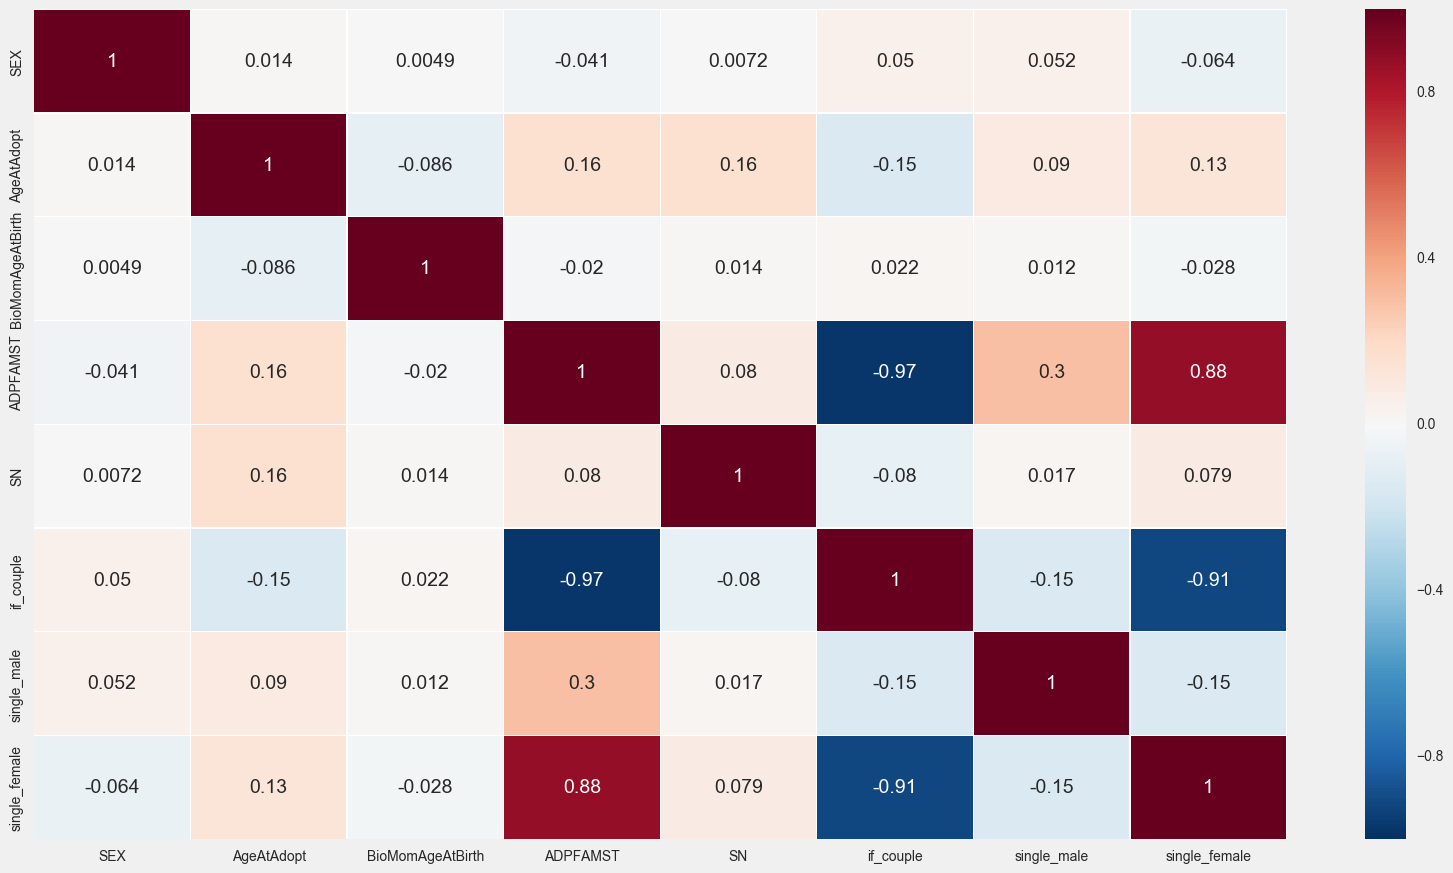

In [40]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df_display.corr(), annot=True, linewidths=.15, ax=ax)
plt.show()

In [41]:
df2=df.drop(['RECNUM','AGYSPNDS','AdoptMomAge','AdoptDadAge','MomRace','DadRace','Transracial','std_age_at_adopt','std_bio_mom_age','std_adopt_mom_age','std_adopt_dad_age'],axis=1)

In [42]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

In [43]:
y, x = patsy.dmatrices("AgeAtAdopt ~ SEX+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female -1", data=df2, return_type="dataframe")
y = np.ravel(y)
print (y.shape)
print ("\n=====\n")
print (x.shape)

(1864,)

=====

(1864, 7)


In [44]:
from sklearn import linear_model

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(xtrain, ytrain)

In [46]:
print ("R^2: %.3f" % (model1.score(xtrain, ytrain)))
print ("Coefficients:", model1.coef_)
print ("Intercept: %.3f" % (model1.intercept_))

R^2: 0.062
('Coefficients:', array([ 0.0897983 , -0.05414021, -0.90873791,  6.77834303, -2.92941715,
        2.90002567,  0.02939148]))
Intercept: 11.272


In [47]:
predictions = lm1.predict(xtest)
predictions.shape

(373,)

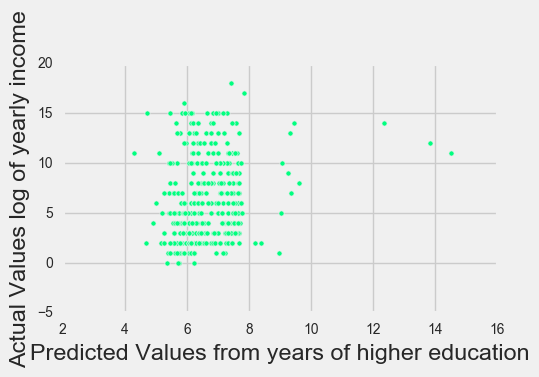

('MSE:', 16.422370003708821)


In [48]:
fig = plt.figure(figsize=(5,3))
plt.scatter(predictions, ytest, s=14, c='springgreen', marker='o')
plt.xlabel("Predicted Values from years of higher education")
plt.ylabel("Actual Values log of yearly income")
plt.show()

print ("MSE:", mean_squared_error(ytest, predictions))

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 32 columns):
SEX                  1933 non-null int64
AgeAtAdopt           1933 non-null int64
ChildRace            1703 non-null float64
BioMomAgeAtBirth     1903 non-null float64
MOMARRD              1702 non-null float64
ADPFAMST             1890 non-null float64
SN                   1933 non-null int64
white                1933 non-null int64
black                1933 non-null int64
amid                 1933 non-null int64
asian                1933 non-null int64
hawaii               1933 non-null int64
mixed                1933 non-null int64
hispanic             1933 non-null int64
if_couple            1933 non-null int64
single_female        1933 non-null int64
single_male          1933 non-null int64
mom_white            1933 non-null int64
mom_black            1933 non-null int64
mom_amid             1933 non-null int64
mom_asian            1933 non-null int64
mom_hawaii           193

In [50]:
lm_stats= smf.ols(formula='AgeAtAdopt ~ SEX+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female+white+black+amid+asian+hawaii+mixed+hispanic+mom_white+mom_black+mom_amid+mom_asian+mom_hawaii+mom_mixed+mom_hispanic+dad_white+dad_black+dad_amid+dad_asian+dad_hawaii+dad_mixed+dad_hispanic+transracial_dummy', data=df2).fit()
print (lm_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             AgeAtAdopt   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     6.217
Date:                Mon, 01 May 2017   Prob (F-statistic):           2.41e-18
Time:                        23:27:11   Log-Likelihood:                -4542.8
No. Observations:                1597   AIC:                             9134.
Df Residuals:                    1573   BIC:                             9263.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             5.6814      1.58

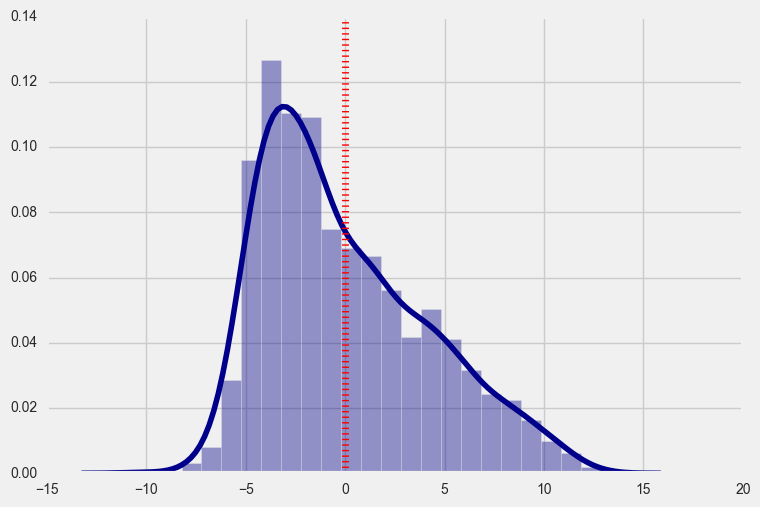

In [51]:
np.mean(lm_stats.resid)
sns.distplot(lm_stats.resid, color='darkblue')
plt.axvline(np.mean(lm_stats.resid), color='red', linestyle='dotted', linewidth=5)
plt.show()

In [52]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [53]:
ridge_alphas=np.logspace(0,5,200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(xtrain, ytrain)

print optimal_ridge.alpha_

1.0


In [54]:
from sklearn.cross_validation import cross_val_score

In [55]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, xtrain, ytrain, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[-0.01263219  0.08229244  0.043156    0.04202982  0.02190131  0.05429163
  0.05753485  0.0272941   0.00542436  0.14196322]
0.0463255551476


In [56]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(xtrain, ytrain)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00217484653056


In [57]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, xtrain, ytrain, cv=10)

print (lasso_scores)

[-0.01218948  0.08237271  0.04173785  0.04192412  0.02000406  0.05317336
  0.05747176  0.02738288  0.00586336  0.14455254]


In [58]:
lasso.fit(xtrain, ytrain)


Lasso(alpha=0.0021748465305582655, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
lasso_coefs = pd.DataFrame({'variable':x.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
3,6.551101,6.551101,SN
5,2.531330,2.531330,single_male
4,2.475748,-2.475748,if_couple
2,0.658461,-0.658461,ADPFAMST
0,0.085599,0.085599,SEX
1,0.054043,-0.054043,BioMomAgeAtBirth
6,0.000000,-0.000000,single_female


In [60]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10, verbose=1)
optimal_enet.fit(xtrain, ytrain)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00217484653056
1.0


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [61]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, xtrain, ytrain, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[-0.01218948  0.08237271  0.04173785  0.04192412  0.02000406  0.05317336
  0.05747176  0.02738288  0.00586336  0.14455254]
0.0462293169228


In [62]:
ridge.fit(xtrain, ytrain)
enet.fit(xtrain, ytrain)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.0021748465305582655, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
ridge_resid = ytest - ridge.predict(xtest)
lasso_resid = ytest - lasso.predict(xtest)
enet_resid = ytest - enet.predict(xtest)

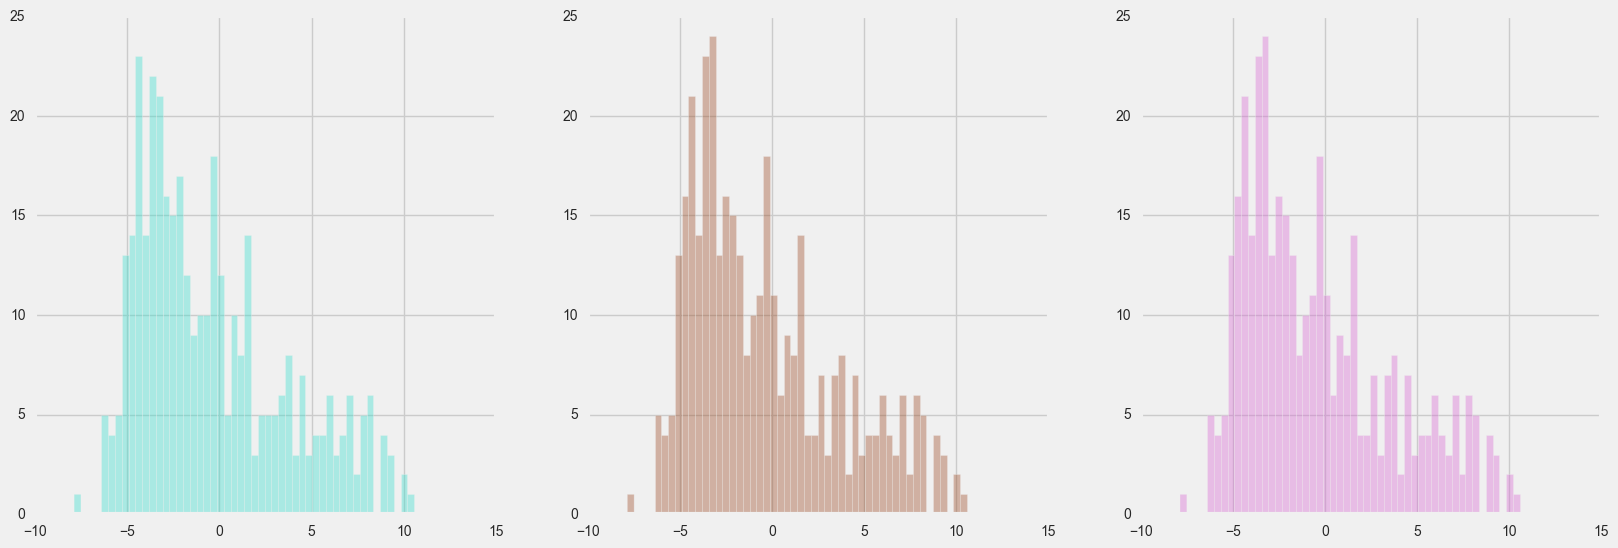

In [64]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='turquoise', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='sienna', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='orchid', ax=axarr[2], label='ElasticNet residuals')

plt.show()

In [65]:
lm_sk = linear_model.LinearRegression()
model_sk = cross_val_score(lm_sk, xtrain, ytrain, cv=10)

In [66]:
print ytrain.mean()

6.71696847753


In [67]:
print (model_sk)

[-0.01403984  0.08363588  0.04041092  0.04198446  0.01918849  0.05605425
  0.05766619  0.03003028  0.00501465  0.14330179]


## prediction on sex of children adopted

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
df_sex=df.drop(['RECNUM','AGYSPNDS','AdoptMomAge','AdoptDadAge','MomRace','DadRace','Transracial','std_age_at_adopt','std_bio_mom_age','std_adopt_mom_age','std_adopt_dad_age'],axis=1)

In [70]:
df_sex.head()


,SEX,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,ADPFAMST,SN,white,black,amid,...,mom_mixed,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_mixed,dad_hispanic,transracial_dummy
0,0,0,1.0,20.0,1.0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
1,1,1,2.0,29.0,0.0,1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1.0
2,0,0,1.0,24.0,0.0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
3,0,0,NaN,28.0,0.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN
4,1,1,NaN,36.0,0.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN


In [71]:
lgm=linear_model.LogisticRegression()


In [72]:
y1, x1 = patsy.dmatrices("SEX ~ AgeAtAdopt+BioMomAgeAtBirth +ADPFAMST+SN+if_couple+single_male+single_female -1", data=df2, return_type="dataframe")
y1 = np.ravel(y1)


In [73]:
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size=0.10)

In [74]:
model = cross_val_score(lgm,x1train, y1train, cv=10)

In [75]:
print y1train.mean()
print model

0.508646392367
[ 0.47928994  0.5147929   0.56213018  0.53571429  0.58682635  0.52095808
  0.50898204  0.53293413  0.51497006  0.48502994]


In [76]:
Cs = np.logspace(0.0, 5.0, 20)

In [77]:
search_parameters = {"penalty": ['l1','l2'],"C": Cs,  "fit_intercept": [False, True], "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']}



In [78]:
from sklearn.grid_search import GridSearchCV

In [79]:
estimator = GridSearchCV(lgm, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [80]:
estimator.fit(x1train, y1train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2564 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   10.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [81]:
lgm_best = estimator.best_estimator_

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
y1predict=estimator.predict(x1test)

confmat = confusion_matrix(y_true=y1test, y_pred=y1predict)
confmat

array([[44, 36],
       [50, 57]])

In [84]:
confusion = pd.DataFrame(confmat, index=['True_Male', 'True_Female'],
                         columns=['Predict_Male', 'Predict_Female'])

confusion

,Predict_Male,Predict_Female
True_Male,44,36
True_Female,50,57


## Random forest


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 43 columns):
RECNUM               1933 non-null int64
SEX                  1933 non-null int64
AGYSPNDS             1933 non-null int64
AgeAtAdopt           1933 non-null int64
ChildRace            1703 non-null float64
BioMomAgeAtBirth     1903 non-null float64
MOMARRD              1702 non-null float64
AdoptMomAge          1890 non-null float64
AdoptDadAge          946 non-null float64
ADPFAMST             1890 non-null float64
MomRace              1853 non-null float64
DadRace              931 non-null float64
Transracial          1933 non-null int64
SN                   1933 non-null int64
std_age_at_adopt     1933 non-null float64
white                1933 non-null int64
black                1933 non-null int64
amid                 1933 non-null int64
asian                1933 non-null int64
hawaii               1933 non-null int64
mixed                1933 non-null int64
hispanic        

In [86]:
dfrf=df.drop(['RECNUM','Transracial','ChildRace','MomRace','DadRace','std_adopt_dad_age','AdoptDadAge'],axis=1)

In [87]:
dfrf.isnull().sum()
dfrf=dfrf.dropna(how='any')

In [88]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )
params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [89]:
ys= dfrf['SEX']
columns=dfrf.columns.tolist()
xs=dfrf[[i for i in columns]]
xs=xs.drop(['SEX'],axis=1)

In [90]:
print ys.shape,
xs.shape

(1419,)

(1419, 35)

In [91]:
dfrf.isnull().sum()

SEX                  0
AGYSPNDS             0
AgeAtAdopt           0
BioMomAgeAtBirth     0
MOMARRD              0
AdoptMomAge          0
ADPFAMST             0
SN                   0
std_age_at_adopt     0
white                0
black                0
amid                 0
asian                0
hawaii               0
mixed                0
hispanic             0
std_bio_mom_age      0
std_adopt_mom_age    0
if_couple            0
single_female        0
single_male          0
mom_white            0
mom_black            0
mom_amid             0
mom_asian            0
mom_hawaii           0
mom_mixed            0
mom_hispanic         0
dad_white            0
dad_black            0
dad_amid             0
dad_asian            0
dad_hawaii           0
dad_mixed            0
dad_hispanic         0
transracial_dummy    0
dtype: int64

In [92]:
def drop_99(x):
    if x==99:
        x=np.nan
    
    else:
        x=x
    return x
    

df['ChildRace']=df['ChildRace'].apply(lambda x: drop_99(x))
df['MomRace']=df['MomRace'].apply(lambda x: drop_99(x))
df['DadRace']=df['DadRace'].apply(lambda x: drop_99(x))

In [93]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.2)

In [94]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [95]:
estimator_rfr.fit(xs_train, ys_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   11.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [96]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=2, max_leaf_nodes=5, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 2, 'max_leaf_nodes': 5, 'min_samples_split': 4, 'n_estimators': 100, 'max_depth': 5}


best score -0.00984107768234


In [97]:
y_pred_rfdtr= rfr_best.predict(xs_test)
y_pred_rfdtr

array([ 0.52653665,  0.49529059,  0.53382899,  0.46281353,  0.49432378,
        0.57430163,  0.48360602,  0.55632648,  0.50784685,  0.53323055,
        0.54477415,  0.52548969,  0.53634509,  0.55327359,  0.54240373,
        0.50932053,  0.55785984,  0.46227836,  0.50290611,  0.51975731,
        0.49166778,  0.50704024,  0.53792936,  0.50456823,  0.48006819,
        0.49049207,  0.50667169,  0.53887921,  0.53518729,  0.55502457,
        0.48618051,  0.49853395,  0.50079883,  0.50960542,  0.50249598,
        0.52599044,  0.47832239,  0.55512331,  0.50141539,  0.50852312,
        0.52484005,  0.54191451,  0.50295461,  0.48802487,  0.51255342,
        0.49776901,  0.48877208,  0.53241144,  0.50097454,  0.50125238,
        0.48921049,  0.51104694,  0.52717161,  0.50817404,  0.50909029,
        0.5440382 ,  0.50626524,  0.53781439,  0.49928221,  0.52457566,
        0.54899486,  0.49746269,  0.55304545,  0.52371945,  0.52924904,
        0.5532135 ,  0.48304438,  0.49919251,  0.51115989,  0.48

In [98]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model): 
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [99]:
rsquare_meansquare_error(ys_train, ys_test, xs_train, xs_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.25, test data: 0.25
R^2 Random Forest Regression tree train data: 0.02, test data: -0.00


## Regression tree on children race

In [100]:
dfrf2=df.drop(['white','black','amid','asian','hawaii','mixed','hispanic','RECNUM','Transracial','MomRace','DadRace','std_adopt_dad_age','AdoptDadAge'],axis=1)
dfrf2=dfrf2.dropna(how='any')
yr= dfrf2['ChildRace']
columns=dfrf2.columns.tolist()
xr=dfrf2[[i for i in columns]]
xr=xr.drop(['SEX','ChildRace'],axis=1)


In [101]:
xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size=0.2)

In [102]:
estimator_rfr.fit(xr_train, yr_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   13.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [103]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 4}


best score 0.391466874218


In [104]:
yr_pred_rfdtr= rfr_best.predict(xr_test)
yr_pred_rfdtr

array([ 2.31260313,  1.47302577,  2.39138774,  2.45186835,  2.32329071,
        2.67032932,  2.0738377 ,  1.5179874 ,  2.42827183,  2.44220956,
        2.44880715,  3.07657207,  2.68086702,  2.16693523,  2.40773157,
        3.88836547,  1.54934243,  2.49082079,  1.54050113,  2.34598258,
        2.35578384,  2.46247388,  1.99416143,  1.6053435 ,  1.85971092,
        2.28856796,  2.84232942,  1.60678306,  1.53937003,  2.18287158,
        1.496593  ,  2.43103667,  2.34327953,  2.45781307,  2.30568348,
        1.57980159,  2.15196204,  2.84372751,  1.59695074,  2.44220956,
        2.44022108,  2.71453495,  1.83683601,  2.4590731 ,  2.34729135,
        2.25529259,  2.46222224,  2.32731275,  1.53753511,  2.25084932,
        2.20390251,  1.55595795,  2.46675338,  1.48545607,  1.78012746,
        2.3978948 ,  2.33659926,  2.45111334,  1.51153427,  1.83316375,
        2.25746344,  1.53451272,  2.45203095,  2.45323053,  1.56412537,
        2.31037028,  1.559934  ,  2.45022818,  2.33209287,  1.55

In [105]:
rsquare_meansquare_error(yr_train, yr_test, xr_train, xr_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 2.34, test data: 2.31
R^2 Random Forest Regression tree train data: 0.40, test data: 0.37


## K-means on Children's race

In [106]:
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets



In [107]:
dfkn=df

In [108]:
def get_race(x):
    return 'White' if x==1 else 'Black' if x==2 else 'Amind' if x==3 else "Asian" if x==4 else 'Hawaii' if x==5 else  'More than one'  if x==6 else 'Hispanice'
dfkn['ChildRace_Name']=dfkn['ChildRace'].apply(lambda x: get_race(x))

In [109]:
dfkn.head()

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,...,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_mixed,dad_hispanic,transracial_dummy,ChildRace_Name
0,10115515140,0,2,0,1.0,20.0,1.0,33.0,33.0,1.0,...,0,1,0,0,0,0,0,0,0.0,White
1,10185923110,1,2,1,2.0,29.0,0.0,45.0,54.0,1.0,...,0,1,0,0,0,0,0,0,1.0,Black
2,10199738080,0,2,0,1.0,24.0,0.0,36.0,45.0,1.0,...,0,1,0,0,0,0,0,0,0.0,White
3,10206906020,0,2,0,NaN,28.0,0.0,41.0,44.0,1.0,...,0,1,0,0,0,0,0,0,NaN,Hispanice
4,10286352150,1,2,1,NaN,36.0,0.0,32.0,32.0,1.0,...,0,1,0,0,0,0,0,0,NaN,Hispanice


In [110]:
dfkn=dfkn.dropna(how='any')

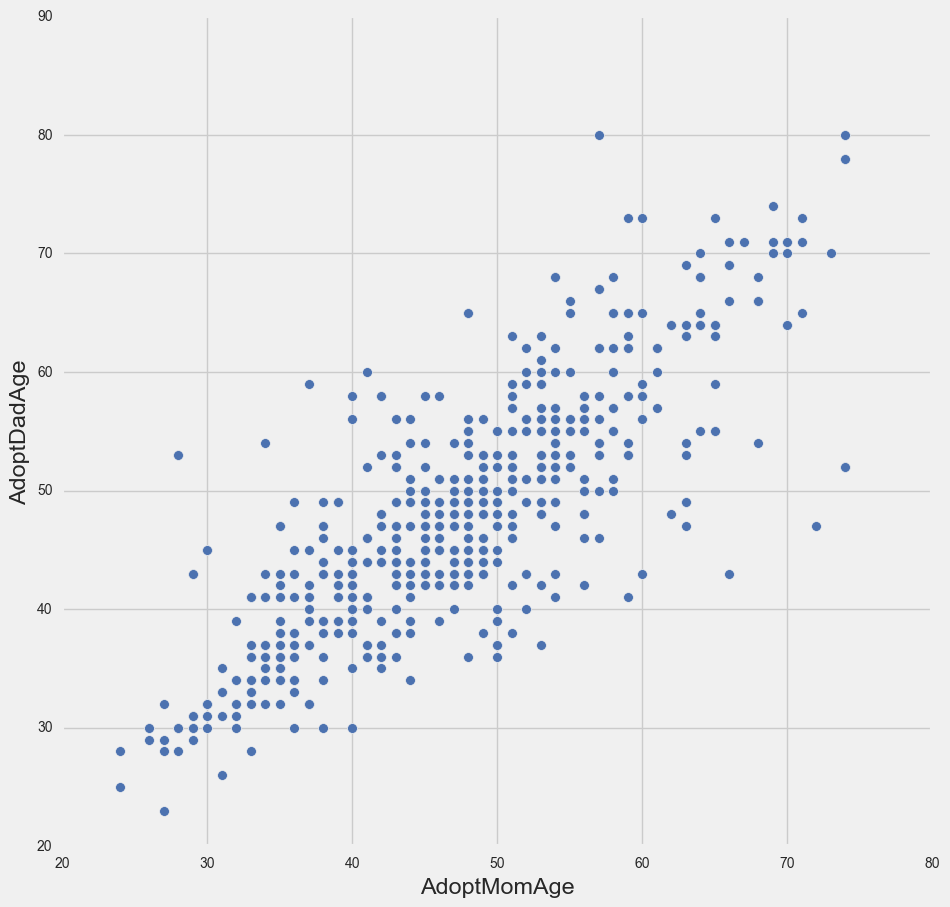

In [111]:
dfkn.plot(kind="scatter", x='AdoptMomAge', y='AdoptDadAge', figsize=(10,10), s = 50)
plt.show()

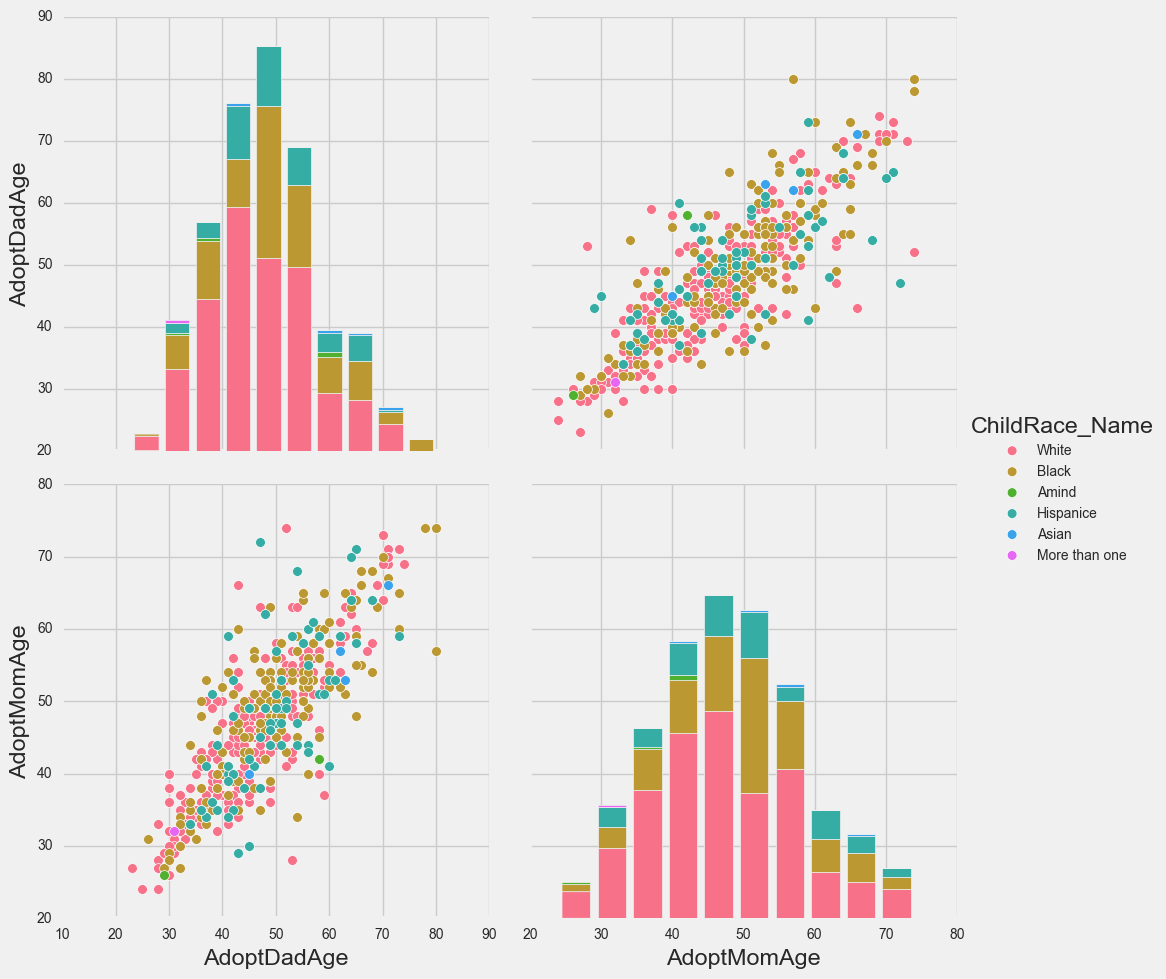

In [112]:
sns.pairplot(dfkn, hue="ChildRace_Name", size = 5,plot_kws={"s": 50}, vars = ["AdoptDadAge", "AdoptMomAge"])
plt.show()

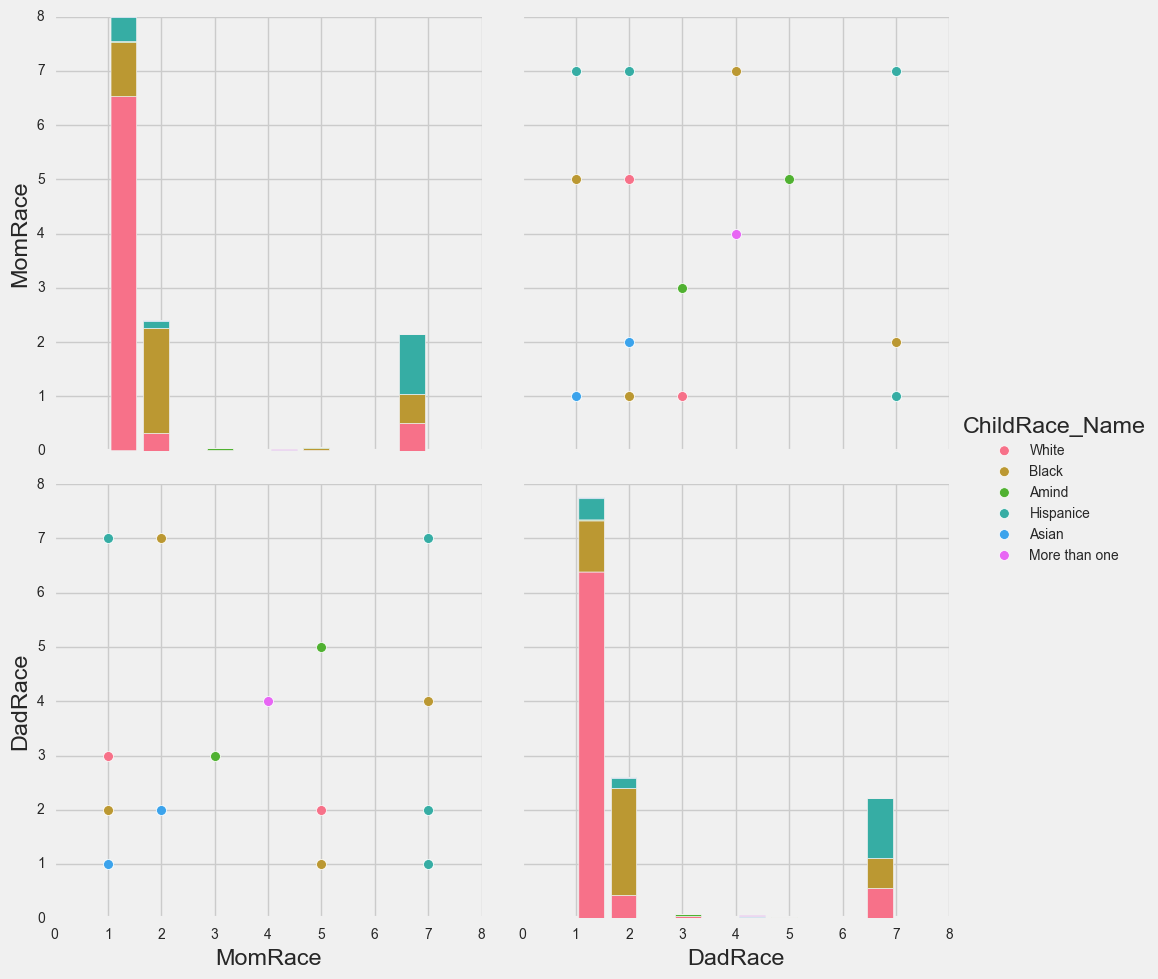

In [113]:
sns.pairplot(dfkn, hue="ChildRace_Name", size = 5,plot_kws={"s": 50}, vars = ["MomRace", "DadRace"])
plt.show()

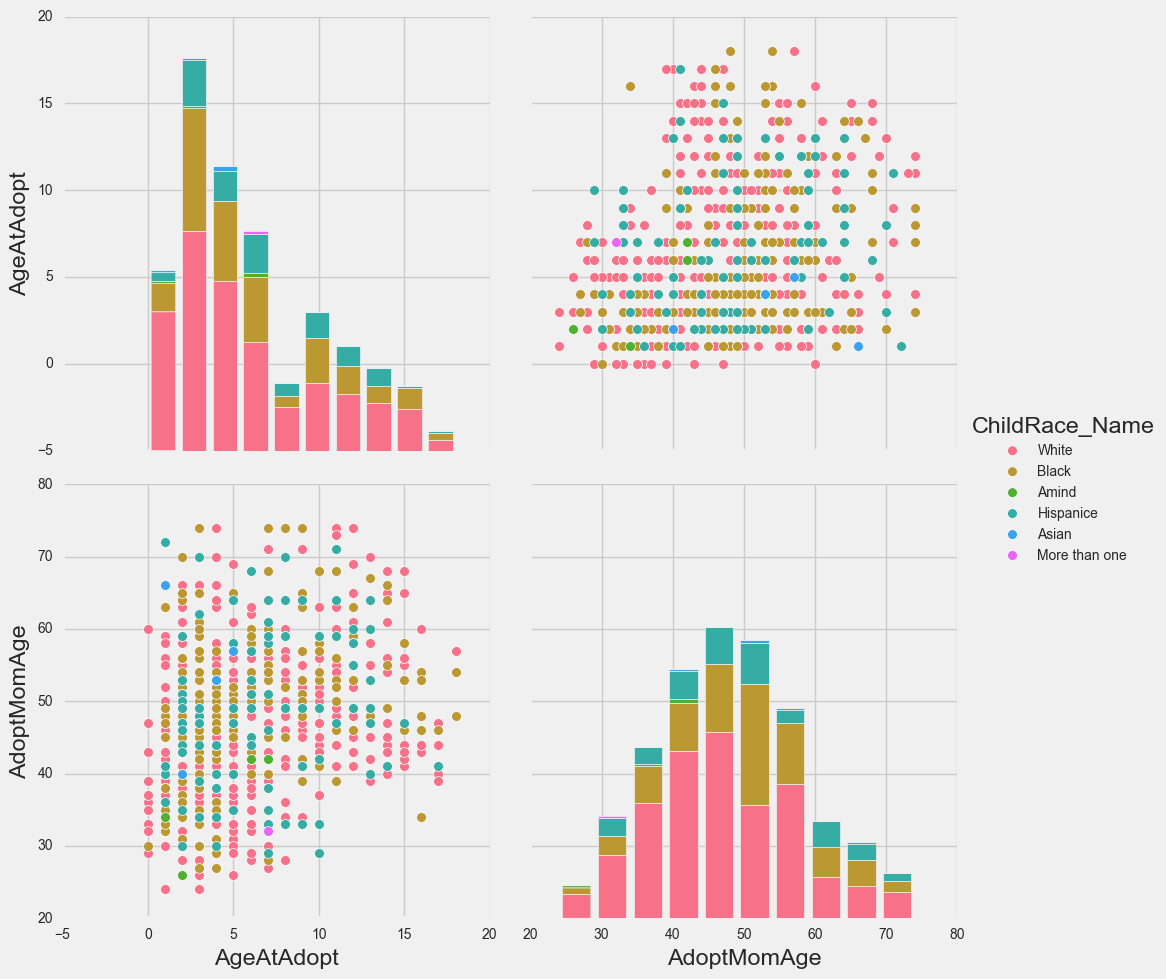

In [114]:
sns.pairplot(dfkn, hue="ChildRace_Name", size = 5,plot_kws={"s": 50}, vars = ["AgeAtAdopt", "AdoptMomAge"])
plt.show()

In [115]:
import random

In [116]:
def get_shack(x):
    h=random.uniform(-0.4,0.4)
    x=x+h
    return x
dfkn_display=dfkn
dfkn_display['MomRace']=dfkn_display['MomRace'].apply(lambda x : get_shack(x))
dfkn_display['DadRace']=dfkn_display['DadRace'].apply(lambda x : get_shack(x))


/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


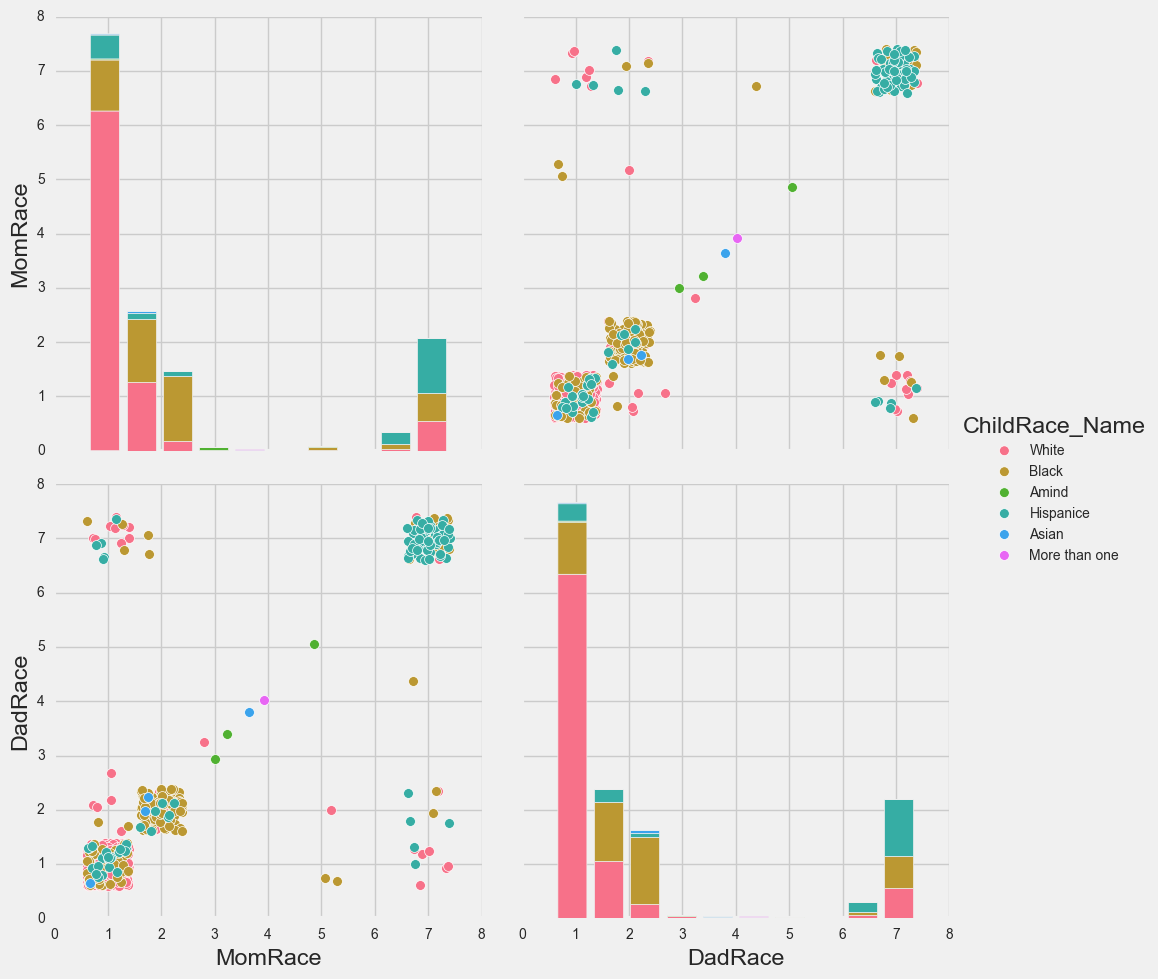

In [117]:
sns.pairplot(dfkn_display, hue="ChildRace_Name", size = 5,plot_kws={"s": 50}, vars = ["MomRace", "DadRace"])
plt.show()

In [118]:
dfkn_apply=df[['ChildRace','MomRace','DadRace','AgeAtAdopt','AdoptMomAge','AdoptDadAge']]

In [119]:
dfkn_apply.groupby('ChildRace').mean()

,MomRace,DadRace,AgeAtAdopt,AdoptMomAge,AdoptDadAge
ChildRace,,,,,
1.0,1.680602,1.554084,6.382258,47.149750,46.769231
2.0,2.581579,2.613636,7.061635,50.783055,49.964758
3.0,3.000000,3.000000,4.000000,36.000000,45.500000
4.0,3.200000,2.333333,5.700000,54.300000,58.500000
6.0,3.000000,4.000000,7.833333,48.000000,31.000000
7.0,4.905138,4.941667,7.574627,51.349810,50.016260


In [120]:
dfkn_apply=dfkn_apply.dropna(how='any')

In [121]:
k = 7
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dfkn_apply)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [122]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print "Labels:", labels
print ""
print "Centroids:", centroids

Labels: [1 5 6 3 5 6 5 1 6 5 3 0 3 5 6 1 1 5 1 0 1 1 0 6 6 5 0 1 1 6 4 1 6 1 5 1 5
 5 1 1 5 6 1 5 5 5 6 6 5 6 5 6 1 1 5 0 5 0 5 5 5 5 0 3 2 2 2 2 3 2 2 3 0 0
 2 2 4 2 0 3 2 2 4 4 4 2 2 2 2 4 2 4 2 0 6 2 2 4 2 3 3 2 2 0 2 0 4 2 3 2 3
 2 2 4 3 4 3 2 2 2 4 6 4 0 2 0 3 3 6 3 1 3 2 2 3 4 3 3 0 0 2 3 0 0 2 2 0 0
 1 2 1 6 1 6 3 2 3 0 0 2 2 2 2 0 0 0 0 3 0 3 3 0 0 3 5 4 2 6 3 4 2 2 0 0 0
 0 2 0 4 2 2 0 2 0 2 0 3 2 2 0 0 0 0 1 6 0 0 2 6 6 6 0 5 1 4 0 1 6 0 0 0 2
 0 2 2 0 4 2 2 2 2 2 2 4 4 6 2 2 4 3 0 2 2 4 0 2 0 3 3 0 5 3 6 0 4 6 6 6 6
 2 5 0 1 3 3 4 6 6 0 3 3 5 6 6 2 0 3 6 0 0 4 4 6 6 2 2 2 0 0 5 3 6 3 0 5 2
 2 1 6 5 0 2 3 2 2 1 0 5 1 3 5 5 0 3 6 0 6 4 3 0 0 1 6 5 1 3 5 6 2 5 6 1 1
 0 5 2 2 5 3 3 3 4 5 6 6 0 3 3 0 5 1 3 5 5 5 6 4 4 4 6 5 0 0 4 4 4 4 5 0 6
 3 3 1 6 6 6 1 5 5 5 3 6 5 0 0 3 5 0 5 6 6 4 6 1 5 3 5 5 4 3 5 6 0 1 6 5 1
 6 6 5 3 3 5 6 5 3 0 0 0 5 5 1 3 5 5 5 5 2 5 1 0 0 0 6 1 5 0 6 2 5 5 6 6 5
 6 5 1 5 5 6 5 5 5 3 5 5 0 6 0 1 5 5 6 4 6 5 2 2 2 6 3 3 0 0 3 3 5 3 0 0 3
 5 0 6 3 4 3 6 5 

In [123]:
metrics.silhouette_score(dfkn_apply, labels, metric='euclidean')

0.21886496677928544

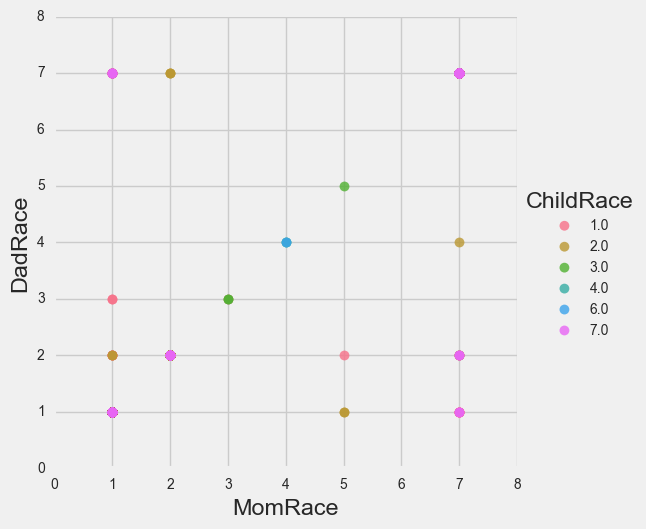

In [124]:
dfkn_apply['ChildRace'] = labels
sns.lmplot(
    x = 'MomRace',
    y = 'DadRace',
    hue = 'ChildRace',
    data = df,
    size = 5.5,
    scatter_kws={"s": 50},
    fit_reg=False);
plt.show()

In [125]:
from sklearn.cluster import KMeans
k_range = range(2,10)
sil_list = []
WCSS_list = []
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dfkn_apply)
    
    cluster_labels = kmeans.labels_
    
    sil_score = metrics.silhouette_score(dfkn_apply, cluster_labels)
    sil_list.append(sil_score)
    
    wcss = kmeans.inertia_
    WCSS_list.append(wcss)
plt.show()

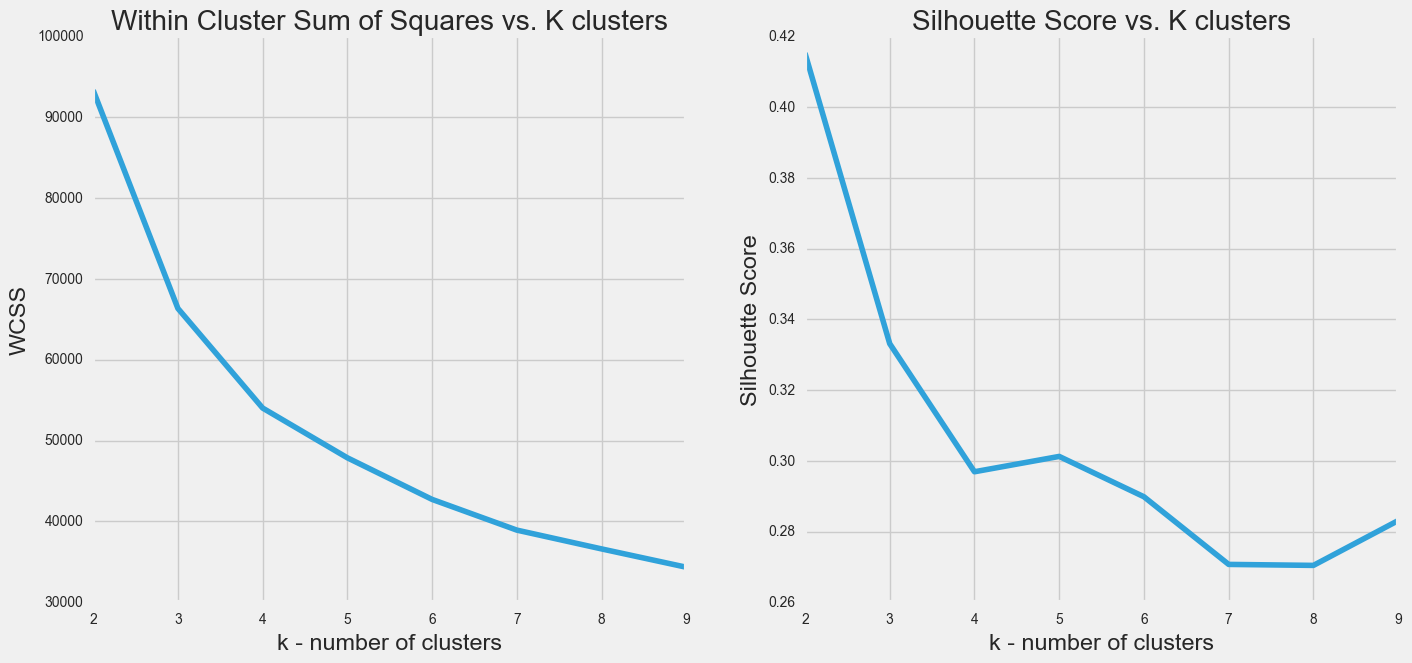

In [126]:
fig = plt.figure(figsize = (15,15))
fig.add_subplot(221)
plt.plot(k_range, WCSS_list)
plt.title("Within Cluster Sum of Squares vs. K clusters");
plt.ylabel("WCSS")
plt.xticks(k_range)
plt.xlabel("k - number of clusters");

fig.add_subplot(222)
plt.plot(k_range, sil_list)
plt.xticks(k_range)
plt.title("Silhouette Score vs. K clusters");
plt.ylabel("Silhouette Score")
plt.xlabel("k - number of clusters");
plt.show()

## PCA on children's age at adopt

In [253]:
dfa=df

In [254]:
dfa.head()

,RECNUM,SEX,AGYSPNDS,AgeAtAdopt,ChildRace,BioMomAgeAtBirth,MOMARRD,AdoptMomAge,AdoptDadAge,ADPFAMST,...,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_mixed,dad_hispanic,transracial_dummy,ChildRace_Name
0,10115515140,0,2,0,1.0,20.0,1.0,33.0,33.0,1.0,...,0,1,0,0,0,0,0,0,0.0,White
1,10185923110,1,2,1,2.0,29.0,0.0,45.0,54.0,1.0,...,0,1,0,0,0,0,0,0,1.0,Black
2,10199738080,0,2,0,1.0,24.0,0.0,36.0,45.0,1.0,...,0,1,0,0,0,0,0,0,0.0,White
3,10206906020,0,2,0,NaN,28.0,0.0,41.0,44.0,1.0,...,0,1,0,0,0,0,0,0,NaN,Hispanice
4,10286352150,1,2,1,NaN,36.0,0.0,32.0,32.0,1.0,...,0,1,0,0,0,0,0,0,NaN,Hispanice


In [255]:
dfa=dfa.drop(['RECNUM','SEX','ChildRace','MomRace','DadRace','AdoptMomAge','AdoptDadAge','ChildRace_Name'],axis=1)

In [256]:
dfa.head().T

,0,1,2,3,4
AGYSPNDS,2.000000,2.000000,2.000000,2.000000,2.000000
AgeAtAdopt,0.000000,1.000000,0.000000,0.000000,1.000000
BioMomAgeAtBirth,20.000000,29.000000,24.000000,28.000000,36.000000
MOMARRD,1.000000,0.000000,0.000000,0.000000,0.000000
ADPFAMST,1.000000,1.000000,1.000000,1.000000,1.000000
Transracial,0.000000,1.000000,0.000000,9.000000,9.000000
SN,0.000000,0.000000,0.000000,0.000000,0.000000
std_age_at_adopt,-1.539235,-1.309515,-1.539235,-1.539235,-1.309515
white,1.000000,0.000000,1.000000,0.000000,0.000000
black,0.000000,1.000000,0.000000,0.000000,0.000000


In [257]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 36 columns):
AGYSPNDS             1933 non-null int64
AgeAtAdopt           1933 non-null int64
BioMomAgeAtBirth     1903 non-null float64
MOMARRD              1702 non-null float64
ADPFAMST             1890 non-null float64
Transracial          1933 non-null int64
SN                   1933 non-null int64
std_age_at_adopt     1933 non-null float64
white                1933 non-null int64
black                1933 non-null int64
amid                 1933 non-null int64
asian                1933 non-null int64
hawaii               1933 non-null int64
mixed                1933 non-null int64
hispanic             1933 non-null int64
std_bio_mom_age      1903 non-null float64
std_adopt_mom_age    1890 non-null float64
std_adopt_dad_age    946 non-null float64
if_couple            1933 non-null int64
single_female        1933 non-null int64
single_male          1933 non-null int64
mom_white          

In [258]:
dfa=dfa.drop(['hawaii','mom_mixed','dad_mixed','single_female','single_male','if_couple'],axis=1)

In [259]:
dfa=dfa.dropna(how='any')

In [260]:
corr = np.corrcoef(dfa.values.T)
dfa.corr()

,AGYSPNDS,AgeAtAdopt,BioMomAgeAtBirth,MOMARRD,ADPFAMST,Transracial,SN,std_age_at_adopt,white,black,...,mom_asian,mom_hawaii,mom_hispanic,dad_white,dad_black,dad_amid,dad_asian,dad_hawaii,dad_hispanic,transracial_dummy
AGYSPNDS,1.000000,-0.086512,-0.004083,0.022996,0.013686,-0.160660,-1.000000,-0.086512,0.062355,0.032553,...,0.002797,0.003961,0.023830,0.065880,-0.104146,0.003961,0.003428,0.001977,0.024303,-0.098680
AgeAtAdopt,-0.086512,1.000000,-0.081699,0.111179,-0.075304,0.020280,0.086512,1.000000,-0.060915,0.025176,...,-0.024430,0.083239,0.046168,-0.098614,0.090717,0.013410,-0.024906,-0.034684,0.037070,-0.017254
BioMomAgeAtBirth,-0.004083,-0.081699,1.000000,0.122216,-0.033873,0.088576,0.004083,-0.081699,-0.147739,0.089310,...,0.026193,-0.034923,0.105768,-0.127422,0.099281,-0.047448,0.012230,-0.034610,0.065592,0.088985
MOMARRD,0.022996,0.111179,0.122216,1.000000,-0.049612,-0.001196,-0.022996,0.111179,0.175502,-0.182182,...,-0.022996,0.069848,-0.083896,0.169366,-0.145229,0.018640,-0.028184,-0.016249,-0.059056,0.005136
ADPFAMST,0.013686,-0.075304,-0.033873,-0.049612,1.000000,0.018426,-0.013686,-0.075304,-0.095259,0.111251,...,-0.013686,-0.019382,0.052292,-0.039627,0.011026,-0.019382,-0.016774,-0.009671,0.032660,0.040857
Transracial,-0.160660,0.020280,0.088576,-0.001196,0.018426,1.000000,0.160660,0.020280,-0.275594,0.256272,...,0.067762,0.205599,0.352726,-0.327701,0.029688,0.008257,0.121002,0.113524,0.358437,0.886735
SN,-1.000000,0.086512,0.004083,-0.022996,-0.013686,0.160660,1.000000,0.086512,-0.062355,-0.032553,...,-0.002797,-0.003961,-0.023830,-0.065880,0.104146,-0.003961,-0.003428,-0.001977,-0.024303,0.098680
std_age_at_adopt,-0.086512,1.000000,-0.081699,0.111179,-0.075304,0.020280,0.086512,1.000000,-0.060915,0.025176,...,-0.024430,0.083239,0.046168,-0.098614,0.090717,0.013410,-0.024906,-0.034684,0.037070,-0.017254
white,0.062355,-0.060915,-0.147739,0.175502,-0.095259,-0.275594,-0.062355,-0.060915,1.000000,-0.725669,...,-0.062355,-0.050347,-0.312310,0.610583,-0.430651,-0.012388,-0.076422,-0.044061,-0.310740,-0.339895
black,0.032553,0.025176,0.089310,-0.182182,0.111251,0.256272,-0.032553,0.025176,-0.725669,1.000000,...,-0.032553,0.037794,-0.027074,-0.427487,0.546462,-0.046102,0.008506,-0.023002,-0.019307,0.300456


In [261]:
eig_vals, eig_vecs = np.linalg.eig(corr)
print "Eigenvalues:\n" , eig_vals
print "\n======\n"
print "Eigenvector Matrix:\n", eig_vecs

Eigenvalues:
[  4.94652277e+00   2.90272674e+00   2.59409295e+00   2.47894551e+00
   2.35853628e+00   2.08396030e+00   1.91661374e+00   1.78776939e+00
   1.44400228e+00   1.34788889e+00   1.00642216e+00   9.57762928e-01
   8.56503336e-01   7.79458111e-01   5.41990393e-01   5.65710175e-01
   3.48787003e-01   2.85442901e-01   2.33035868e-01   1.63127572e-01
   5.41938765e-02   8.42461705e-02   1.36935154e-01   1.22967696e-01
   2.35780602e-03  -1.23558813e-15  -8.61222530e-17   1.74812141e-16
   1.77684693e-15   1.44316736e-15]


Eigenvector Matrix:
[[  7.33080298e-02   2.32806704e-02  -3.52086881e-02   3.41600973e-02
    1.74063933e-01   5.79358642e-01  -1.23407790e-01  -2.82094359e-01
   -4.88077687e-02   7.02672387e-02   4.65501836e-02   1.92463501e-02
   -2.07007586e-02   2.50432669e-02  -1.30588019e-01   8.99549124e-03
   -3.07211205e-02   1.24337953e-03  -2.05714058e-02  -1.86138596e-02
    3.25290547e-02  -8.50867835e-03  -3.87374200e-03   2.91810715e-03
    2.63159302e-04  -1.947

In [262]:
var_exp = sorted( ((eig_vals) / (eig_vals.sum())* 100), reverse=True) 
var_exp

[16.488409219766666,
 9.6757557980486588,
 8.6469765111720154,
 8.2631517126404965,
 7.8617875985770622,
 6.9465343238834576,
 6.3887124818515755,
 5.9592313056440274,
 4.8133409364751296,
 4.4929629522305268,
 3.3547405287495931,
 3.1925430931863041,
 2.8550111209850217,
 2.5981937027751636,
 1.8857005829929416,
 1.8066346436805987,
 1.1626233441895426,
 0.951476335293298,
 0.7767862258630629,
 0.54375857282084217,
 0.45645051297244049,
 0.40989231955962285,
 0.280820568382528,
 0.18064625484427513,
 0.007859353415135082,
 5.9228230909135732e-15,
 4.810557873461353e-15,
 5.8270713508453786e-16,
 -2.8707417653121761e-16,
 -4.1186270863924422e-15]

In [263]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 16.48840922,  26.16416502,  34.81114153,  43.07429324,
        50.93608084,  57.88261516,  64.27132765,  70.23055895,
        75.04389989,  79.53686284,  82.89160337,  86.08414646,
        88.93915758,  91.53735129,  93.42305187,  95.22968651,
        96.39230986,  97.34378619,  98.12057242,  98.66433099,
        99.1207815 ,  99.53067382,  99.81149439,  99.99214065,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

In [264]:

value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)
value_vector_pairs

[[4.9465227659300028,
  array([ 0.07330803, -0.0927516 , -0.1104477 ,  0.09009547, -0.01829469,
         -0.2118385 , -0.07330803, -0.0927516 ,  0.35194193, -0.2677613 ,
         -0.0082388 , -0.04295137, -0.02154759, -0.14657   , -0.1104477 ,
         -0.16626671, -0.19120314,  0.40812671, -0.28139081, -0.00917715,
         -0.03296707, -0.02759329, -0.22013457,  0.40276997, -0.28248524,
         -0.00365787, -0.04117171, -0.01046548, -0.20966126, -0.16359024])],
 [2.9027267394145992,
  array([ 0.02328067, -0.12022943,  0.05530978,  0.04593226,  0.02529339,
          0.25546782, -0.02328067, -0.12022943, -0.02424586, -0.20930892,
          0.07668496,  0.03377531,  0.11781263,  0.27486455,  0.05530978,
         -0.14624421, -0.13074967, -0.0156565 , -0.39236808,  0.0477056 ,
          0.12532087,  0.05116942,  0.39485868, -0.01896559, -0.3864022 ,
          0.04304184,  0.13224992,  0.071909  ,  0.39721532,  0.23210107])],
 [2.5940929533516059,
  array([-0.03520869,  0.22782472, -0.00

In [265]:
weight_3d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1),
                                 value_vector_pairs[2][1].reshape(eig_vecs.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_3d_projection

Weight data 2d PCA projection matrix:
[[ 0.07330803  0.02328067 -0.03520869]
 [-0.0927516  -0.12022943  0.22782472]
 [-0.1104477   0.05530978 -0.00784479]
 [ 0.09009547  0.04593226  0.05990979]
 [-0.01829469  0.02529339 -0.01777892]
 [-0.2118385   0.25546782 -0.0980025 ]
 [-0.07330803 -0.02328067  0.03520869]
 [-0.0927516  -0.12022943  0.22782472]
 [ 0.35194193 -0.02424586  0.06036069]
 [-0.2677613  -0.20930892 -0.13512757]
 [-0.0082388   0.07668496 -0.1675178 ]
 [-0.04295137  0.03377531 -0.20781663]
 [-0.02154759  0.11781263 -0.37128505]
 [-0.14657     0.27486455  0.21438103]
 [-0.1104477   0.05530978 -0.00784479]
 [-0.16626671 -0.14624421  0.1603016 ]
 [-0.19120314 -0.13074967  0.151588  ]
 [ 0.40812671 -0.0156565   0.00848282]
 [-0.28139081 -0.39236808 -0.11617876]
 [-0.00917715  0.0477056  -0.13736559]
 [-0.03296707  0.12532087 -0.44182944]
 [-0.02759329  0.05116942 -0.07527469]
 [-0.22013457  0.39485868  0.21152908]
 [ 0.40276997 -0.01896559  0.00485893]
 [-0.28248524 -0.3864022  

In [266]:
Z = dfa.dot(weight_3d_projection)
Z.rename(columns={0: 'PC1', 1: 'PC2', 2: 'PC3'}, inplace=True)

In [267]:
Z.head(10)

,PC1,PC2,PC3
0,-0.039567,1.715340,-0.925623
1,-2.968300,1.964982,-0.690074
2,-0.911393,1.730274,-0.798622
7,-1.662464,1.142760,-0.138480
9,-1.538875,1.871982,-0.712441
14,-1.019569,1.580289,-0.517735
20,-3.706830,3.223760,-0.056125
21,-1.081788,1.871723,-0.715771
22,-5.351428,1.685412,-0.879969
23,-1.402569,1.617641,-0.431864


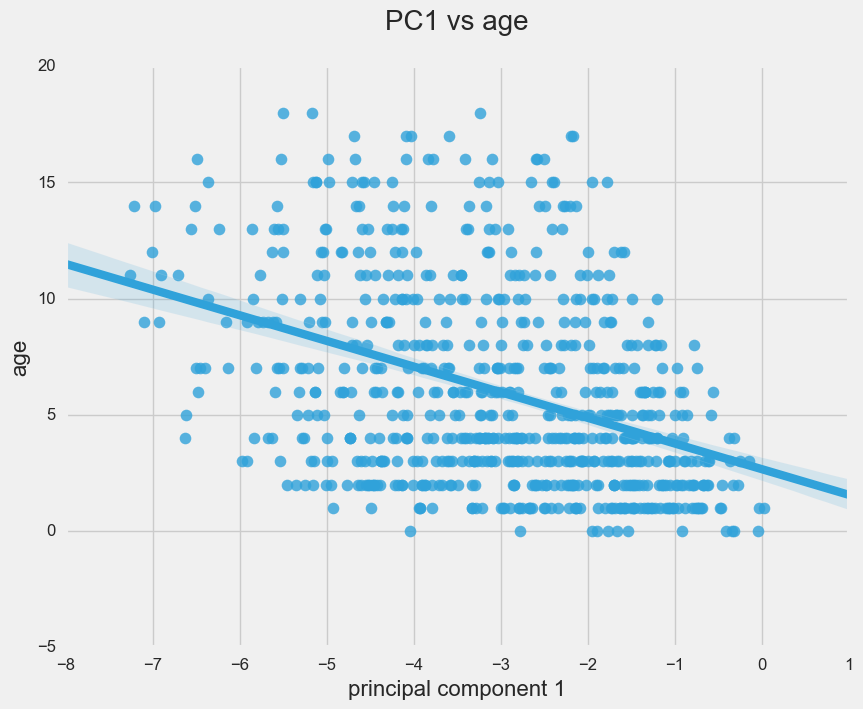

In [268]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.PC1, dfa.AgeAtAdopt,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('age', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs age\n', fontsize=20)

plt.show()

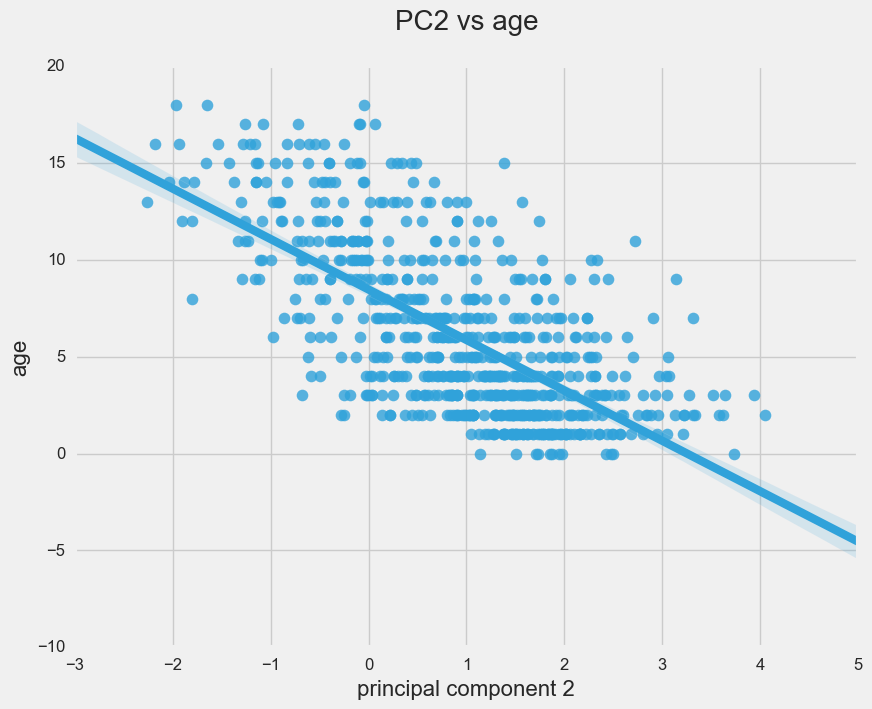

In [269]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.PC2, dfa.AgeAtAdopt,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 2', fontsize=16)
ax.set_ylabel('age', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC2 vs age\n', fontsize=20)

plt.show()

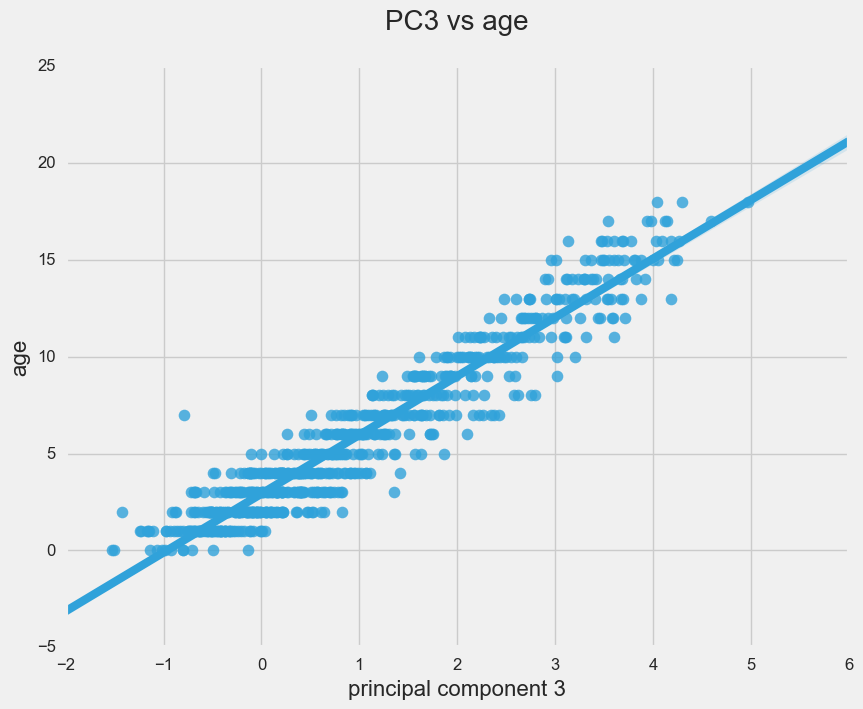

In [270]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.PC3, dfa.AgeAtAdopt,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 3', fontsize=16)
ax.set_ylabel('age', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC3 vs age\n', fontsize=20)

plt.show()